In [1]:
import ISLP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.discriminant_analysis
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from patsy.highlevel import dmatrices
from sklearn.neighbors import KNeighborsClassifier

In [2]:
weekly = load_data('Weekly')
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


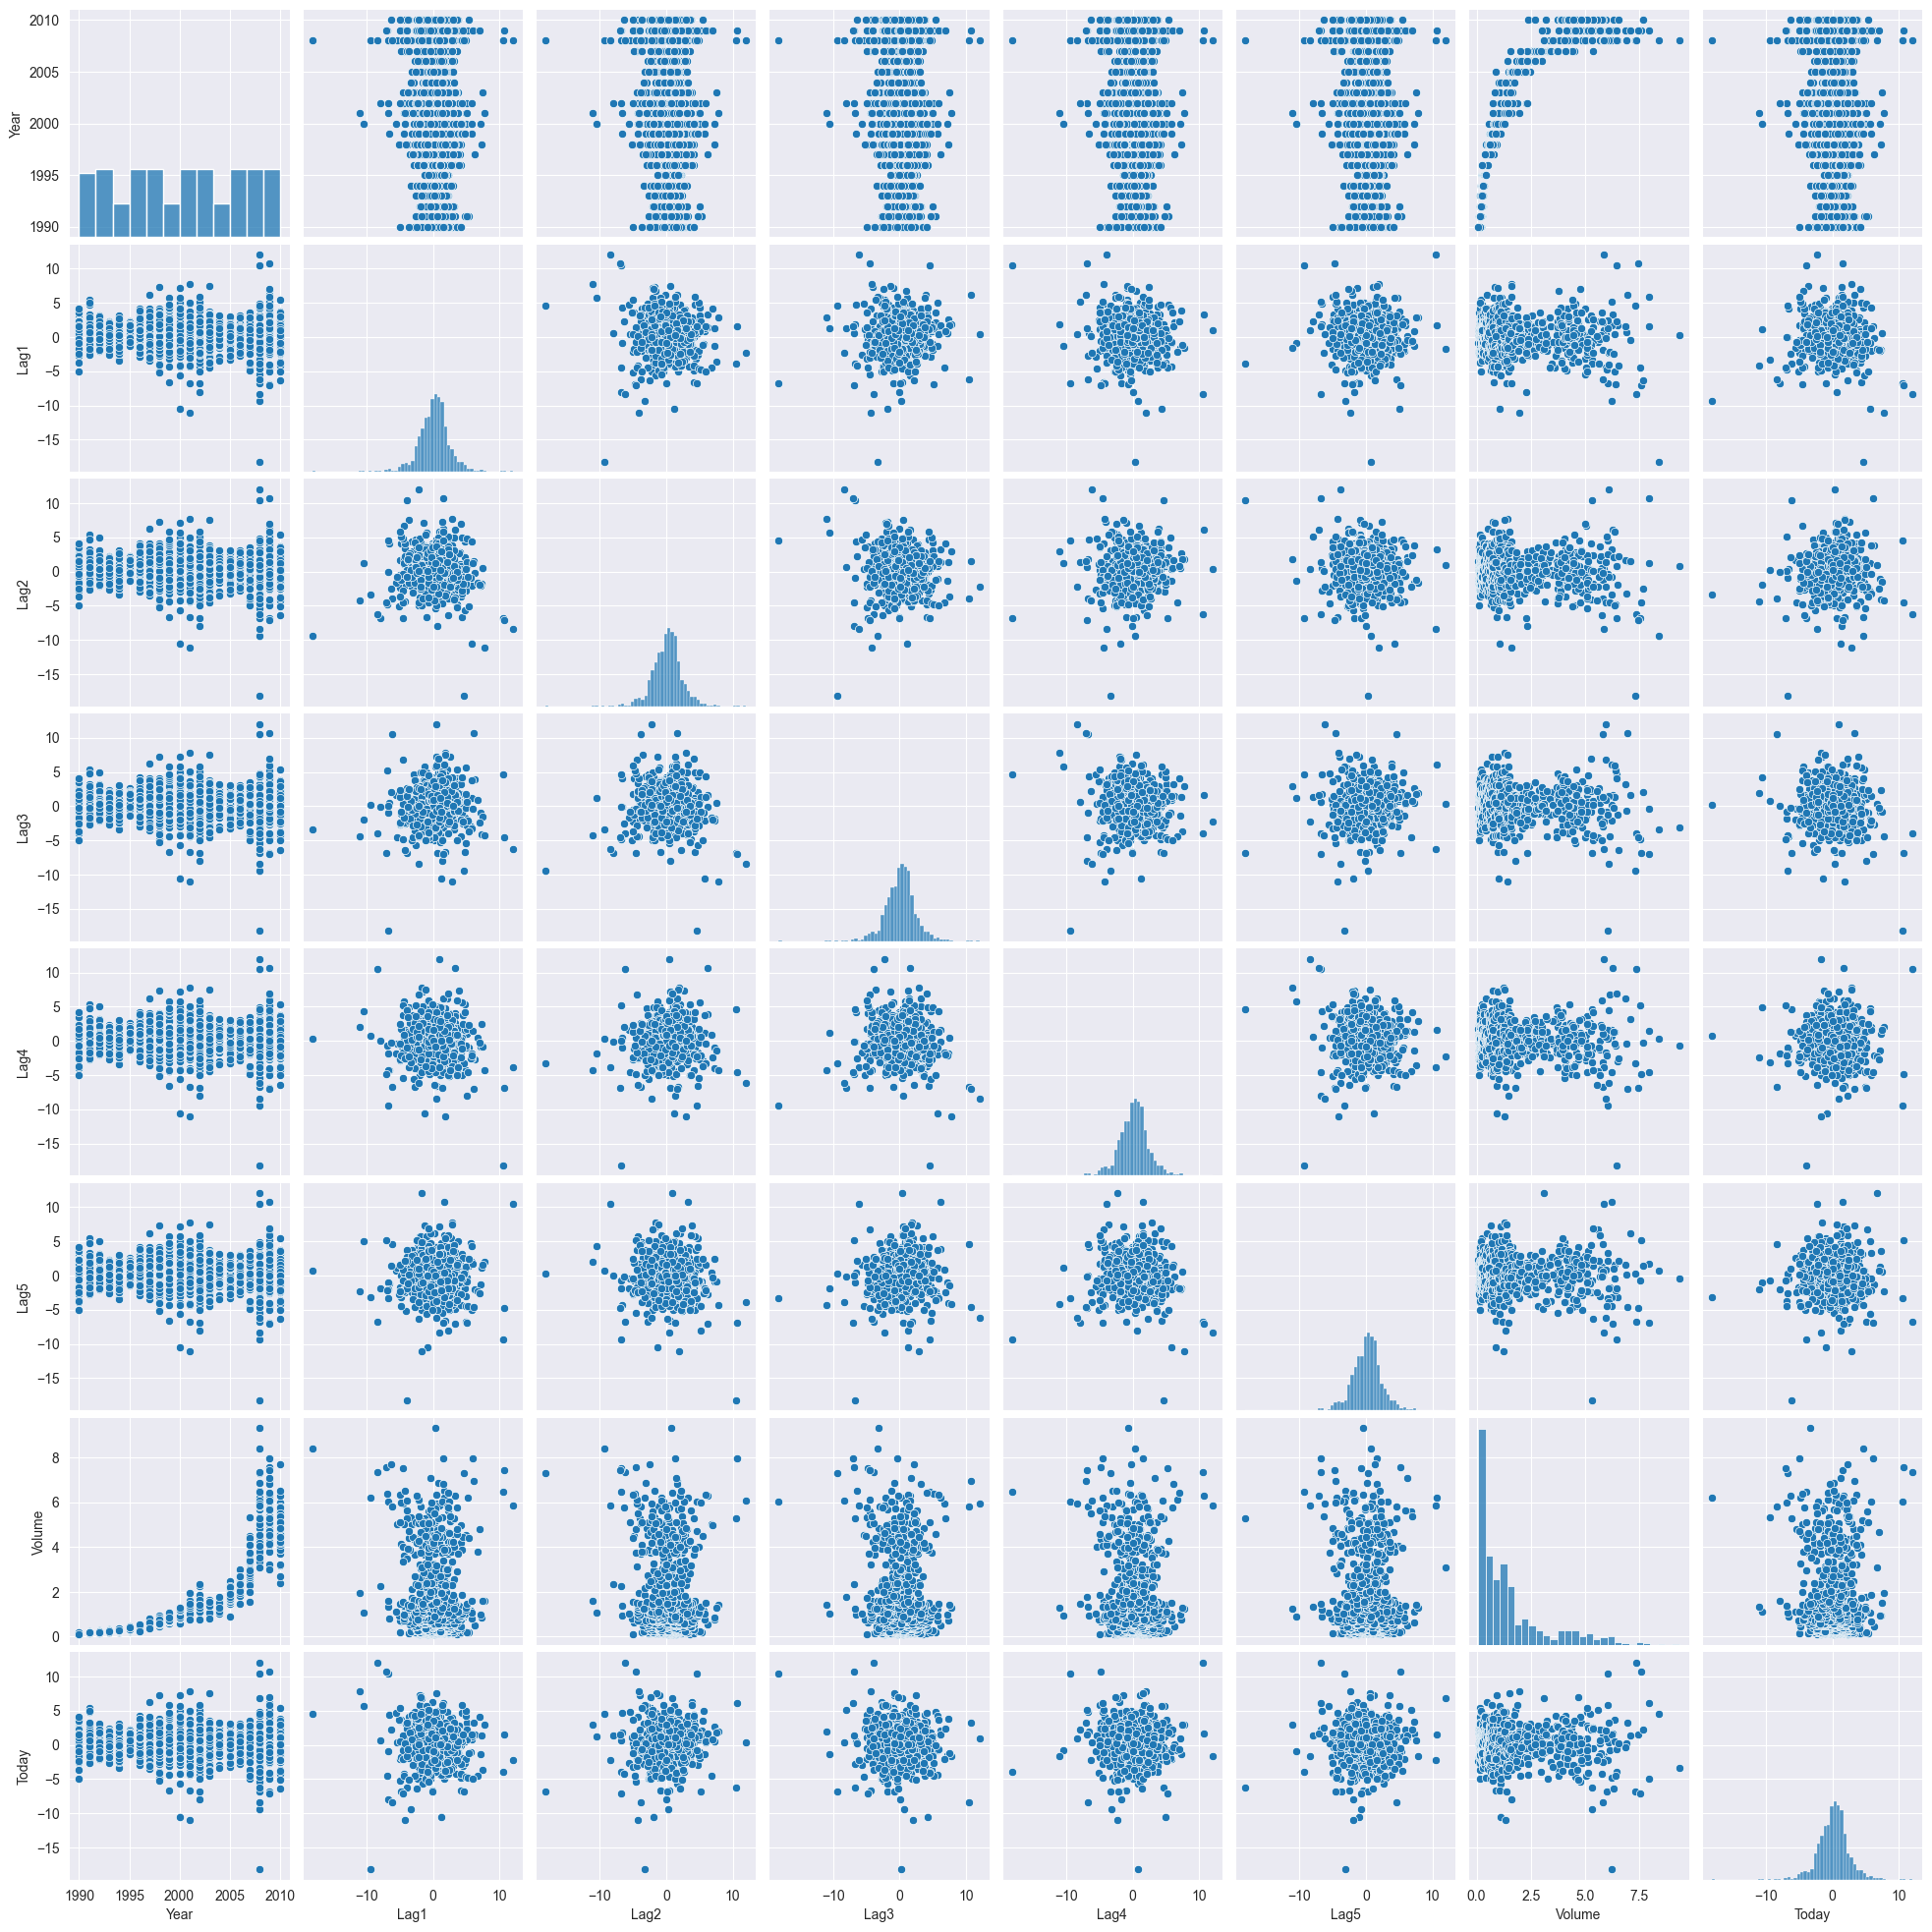

In [3]:
sns.pairplot(weekly)

In [3]:
weekly.corr()

C:\Users\Chinmay Kane\AppData\Local\Temp\ipykernel_1344\3417288410.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: xlabel='Year', ylabel='Volume'>

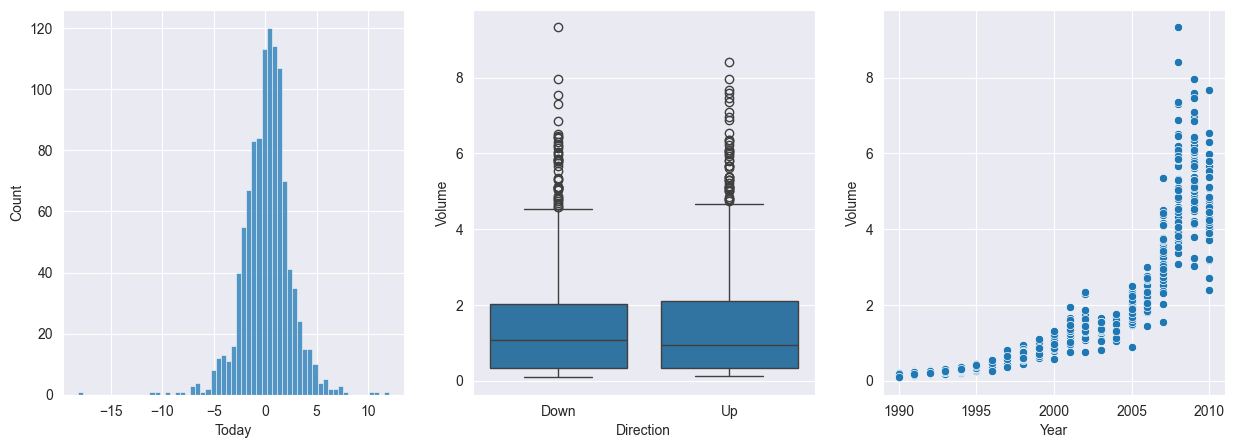

In [4]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.histplot(weekly['Today'], ax=ax[0])
sns.boxplot(data=weekly, x='Direction', y='Volume', ax=ax[1])
sns.scatterplot(data= weekly, x='Year', y='Volume', ax = ax[2])

So here the relationship between year and volume is the only relationship looks interesting due to the correlation coefficient and graph

In [5]:
weekly['Direction'] = weekly['Direction'].map({'Down':0, 'Up':1})

#fit model
y1, X1 = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly, return_type='dataframe')
#logit = sm.Logit(y.ix[:,0], X) #
logit1 = sm.Logit(y1, X1)
result1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [6]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                0.006580
Time:                        06:58:05   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.0

Looking at the Z statistic, we can see that P(z) is small for Lag2 only. Therefore Lag2 is statistically significant

Plotting confusion table---

In [7]:
lr1 = LogisticRegression()
res1 = lr1.fit(weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']], weekly['Direction'])

In [8]:
conf1 = confusion_table(weekly['Direction'], res1.predict(weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]))
print(conf1)

Truth       0    1
Predicted         
0          54  430
1          48  557


In [9]:
res1.score(weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']], weekly['Direction'])

0.5610651974288338

For Lag 2 as the only predictor----
and
training data only from 1990-2008

In [10]:
condition = (weekly['Year']<=2008) & (weekly['Year']>=1990)

In [11]:
x2 = weekly.loc[condition, 'Lag2'].values.reshape(-1, 1)
y2 = weekly.loc[condition, 'Direction'].values
mod2 = lr1.fit(x2, y2)

In [12]:
x2_2 = weekly.loc[~condition, 'Lag2'].values.reshape(-1,1)
y2_2 = weekly.loc[~condition, 'Direction'].values.reshape(-1,1)
confusion_matrix(y2_2, mod2.predict(x2_2))

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

In [13]:
mod2.score(x2_2, y2_2)

0.625

Repeating the above predictions for the following ---- LDA, QDA, KNN with K=1, Naive Bayes

In [14]:
lda3 = sklearn.discriminant_analysis.LinearDiscriminantAnalysis().fit(x2, y2)
qda3 = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis().fit(x2, y2)
knn3 = KNeighborsClassifier(n_neighbors=1).fit(x2, y2)
nvb3 = sklearn.naive_bayes.GaussianNB().fit(x2, y2)

In [15]:
print(confusion_matrix(y2_2, lda3.predict(x2_2)))
print(confusion_matrix(y2_2, qda3.predict(x2_2)))
print(confusion_matrix(y2_2, knn3.predict(x2_2)))
print(confusion_matrix(y2_2, nvb3.predict(x2_2)))

[[ 9 34]
 [ 5 56]]
[[ 0 43]
 [ 0 61]]
[[22 21]
 [31 30]]
[[ 0 43]
 [ 0 61]]


In [16]:
print(lda3.score(x2_2, y2_2))
print(qda3.score(x2_2, y2_2))
print(knn3.score(x2_2, y2_2))
print(nvb3.score(x2_2, y2_2))

0.625
0.5865384615384616
0.5
0.5865384615384616


Here the scores are the highest for Logistic REgression, LDA

Question 14 ---

In [17]:
auto = load_data('Auto')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [18]:
mpg01 = auto['mpg'] > auto['mpg'].median()

In [19]:
auto['mpg01'] = mpg01
auto['mpg01'] = auto['mpg01'].astype(int)


Created the mpg01 column

<Axes: xlabel='mpg01', ylabel='acceleration'>

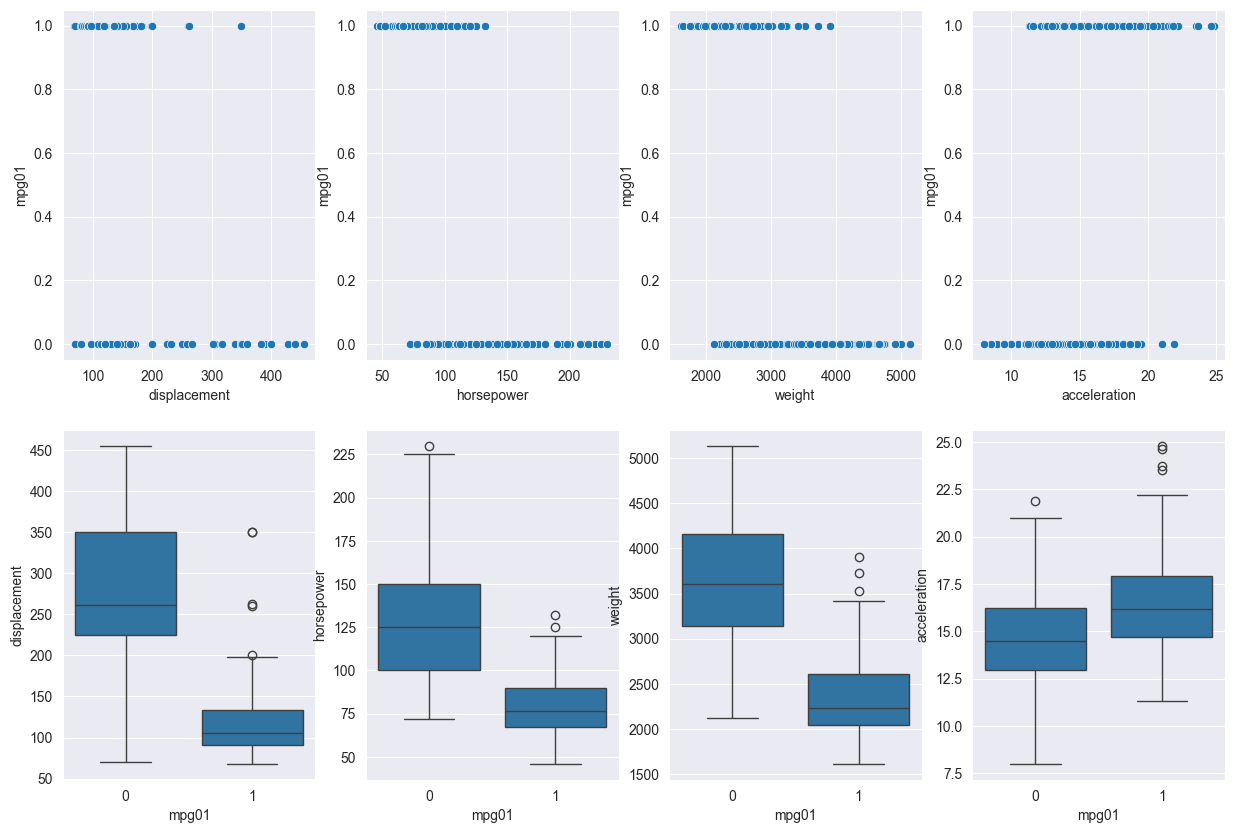

In [20]:
figs, ax = plt.subplots(2, 4, figsize=(15,10))

sns.scatterplot(auto, x='displacement', y='mpg01', ax=ax[0,0])
sns.scatterplot(auto, x='horsepower', y='mpg01', ax=ax[0,1])
sns.scatterplot(auto, x='weight', y='mpg01', ax=ax[0,2])
sns.scatterplot(auto, x='acceleration', y='mpg01', ax=ax[0,3])
sns.boxplot(auto, x='mpg01', y='displacement', ax=ax[1,0])
sns.boxplot(auto, x='mpg01', y='horsepower', ax=ax[1,1])
sns.boxplot(auto, x='mpg01', y='weight', ax=ax[1,2])
sns.boxplot(auto, x='mpg01', y='acceleration', ax=ax[1,3])

In [21]:
auto.corr()

C:\Users\Chinmay Kane\AppData\Local\Temp\ipykernel_1344\4152255377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


Following variables are selected as predictors - cylinders. displacement, weight, horsepower

In [22]:
x4 = auto[['cylinders','displacement','weight','horsepower']].values
y4 = auto['mpg01'].values
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, random_state=1)

In [23]:
log4 = LogisticRegression().fit(x4_train, y4_train)
lda4 = sklearn.discriminant_analysis.LinearDiscriminantAnalysis().fit(x4_train, y4_train)
qda4 = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis().fit(x4_train, y4_train)
knn4 = KNeighborsClassifier(n_neighbors=1).fit(x4_train,y4_train)
nvb4 = sklearn.naive_bayes.GaussianNB().fit(x4_train, y4_train)

In [24]:
print(confusion_matrix(y4_test, log4.predict(x4_test)))
print(confusion_matrix(y4_test, lda4.predict(x4_test)))
print(confusion_matrix(y4_test, qda4.predict(x4_test)))
print(confusion_matrix(y4_test, knn4.predict(x4_test)))
print(confusion_matrix(y4_test, nvb4.predict(x4_test)))

[[50  4]
 [ 4 40]]
[[49  5]
 [ 2 42]]
[[52  2]
 [ 4 40]]
[[47  7]
 [ 5 39]]
[[51  3]
 [ 4 40]]


In [25]:
print(log4.score(x4_test,y4_test))
print(lda4.score(x4_test, y4_test))
print(qda4.score(x4_test, y4_test))
print(knn4.score(x4_test, y4_test))
print(nvb4.score(x4_test, y4_test))

0.9183673469387755
0.9285714285714286
0.9387755102040817
0.8775510204081632
0.9285714285714286


In [26]:
for K in range(1,101):
    knn5 = KNeighborsClassifier(n_neighbors=K).fit(x4_train,y4_train)
    acc = knn5.score(x4_test, y4_test)
    print('K = {:3}, accuracy = {:.4f}'.format(K, acc))

K =   1, accuracy = 0.8776
K =   2, accuracy = 0.8571
K =   3, accuracy = 0.8980
K =   4, accuracy = 0.8980
K =   5, accuracy = 0.8673
K =   6, accuracy = 0.8878
K =   7, accuracy = 0.8878
K =   8, accuracy = 0.9082
K =   9, accuracy = 0.8980
K =  10, accuracy = 0.8980
K =  11, accuracy = 0.9082
K =  12, accuracy = 0.9082
K =  13, accuracy = 0.9082
K =  14, accuracy = 0.9082
K =  15, accuracy = 0.8980
K =  16, accuracy = 0.8980
K =  17, accuracy = 0.8878
K =  18, accuracy = 0.9184
K =  19, accuracy = 0.9184
K =  20, accuracy = 0.9184
K =  21, accuracy = 0.9082
K =  22, accuracy = 0.9082
K =  23, accuracy = 0.9082
K =  24, accuracy = 0.9184
K =  25, accuracy = 0.9082
K =  26, accuracy = 0.9184
K =  27, accuracy = 0.9184
K =  28, accuracy = 0.9184
K =  29, accuracy = 0.9184
K =  30, accuracy = 0.9184
K =  31, accuracy = 0.9184
K =  32, accuracy = 0.9184
K =  33, accuracy = 0.9082
K =  34, accuracy = 0.9082
K =  35, accuracy = 0.8980
K =  36, accuracy = 0.9082
K =  37, accuracy = 0.8980
K

Question 15---

In [89]:
def Power():
    print(2**3)
Power()

8


In [91]:
def Power2(x,a):
    print(int(x)**int(a))
Power2(3,8)

6561


In [92]:
print(Power2(10,3))
print(Power2(8,17))
print(Power2(131,3))

1000
None
2251799813685248
None
2248091
None


In [93]:
def Power3(x,a):
    return int(x)**int(a)

Question 16 ---

In [27]:
boston = load_data('Boston')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [29]:
crim01 = boston['crim'] >= boston['crim'].median()
boston['crim01'] = crim01.astype(int)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [30]:
boston.corr().where()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741


In [32]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv', 'crim01'],
      dtype='object')

In [33]:
x5 = boston[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'lstat', 'medv']].values
x6 = boston[['indus', 'nox', 'age', 'dis', 'rad', 'tax']].values
y5 = boston['crim01'].values

In [34]:
log5 = LogisticRegression().fit(x5,y5)
lda5 = sklearn.discriminant_analysis.LinearDiscriminantAnalysis().fit(x5,y5)
qda5 = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis().fit(x5,y5)
nvb5 = sklearn.naive_bayes.GaussianNB().fit(x5,y5)
knn6 = KNeighborsClassifier(n_neighbors=1).fit(x5,y5)

C:\Users\Chinmay Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(log5.score(x5,y5))
print(lda5.score(x5,y5))
print(qda5.score(x5,y5))
print(knn6.score(x5,y5))
print(nvb5.score(x5,y5))

0.841897233201581
0.857707509881423
0.9169960474308301
1.0
0.8122529644268774


In [36]:
log5 = LogisticRegression().fit(x6,y5)
lda5 = sklearn.discriminant_analysis.LinearDiscriminantAnalysis().fit(x6,y5)
qda5 = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis().fit(x6,y5)
nvb5 = sklearn.naive_bayes.GaussianNB().fit(x6,y5)
knn6 = KNeighborsClassifier(n_neighbors=1).fit(x6,y5)

C:\Users\Chinmay Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print(log5.score(x6,y5))
print(lda5.score(x6,y5))
print(qda5.score(x6,y5))
print(knn6.score(x6,y5))
print(nvb5.score(x6,y5))

0.8438735177865613
0.8478260869565217
0.9011857707509882
1.0
0.8162055335968379
